<a href="https://colab.research.google.com/github/aniketwankhade397-lgtm/desion_tree_lone_defalture_detecation/blob/main/Lone_approvel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [179]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'credit-risk-dataset' dataset.
Path to dataset files: /kaggle/input/credit-risk-dataset


In [180]:
lone=pd.read_csv('/content/credit_risk_dataset.csv')
print(lone.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [181]:
print(lone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [182]:
# null values in the table

print(lone.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [183]:
for col in lone.columns:
  print(lone[col].value_counts())


person_age
23     3889
22     3633
24     3549
25     3037
26     2477
27     2138
28     1854
29     1687
30     1316
21     1229
31     1142
32      964
33      856
34      709
35      620
36      548
37      478
38      373
39      302
40      271
41      241
42      188
43      164
44      141
45      108
46       94
47       94
48       75
50       52
49       49
51       39
52       36
53       30
54       24
55       20
58       19
20       15
60       15
56       15
57       15
65        9
61        9
66        9
70        7
62        7
64        7
59        5
69        5
63        3
144       3
73        3
123       2
78        1
94        1
80        1
84        1
76        1
67        1
Name: count, dtype: int64
person_income
60000      1046
30000       847
50000       778
40000       658
45000       590
           ... 
39240         1
720000        1
1900000       1
78956         1
46680         1
Name: count, Length: 4295, dtype: int64
person_home_ownership
RENT        164

In [184]:
ext=lone['person_age']>60

print(ext.value_counts())
lone=lone[lone['person_age']<60]
ext=lone['person_age']>60

print(ext.value_counts())

person_age
False    32511
True        70
Name: count, dtype: int64
person_age
False    32496
Name: count, dtype: int64


In [185]:
# creating bins
import pandas as pd

lone['age_bin'] = pd.cut(
    lone['person_age'],
    bins=[18, 25, 35, 50, 100],
    labels=['18-25', '25-35', '35-50', '50+']
)
print(lone['age_bin'].value_counts())


age_bin
18-25    15352
25-35    13763
35-50     3178
50+        203
Name: count, dtype: int64


In [186]:
lone["loan_int_rate"] = (
    lone.groupby("loan_grade")["loan_int_rate"]
        .transform(lambda x: x.fillna(x.median()))
)


lone["person_emp_length"]=(
    lone.groupby("age_bin")["person_emp_length"]
        .transform(lambda x: x.fillna(x.median()))
)
print(lone.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
age_bin                       0
dtype: int64


/tmp/ipython-input-2754128789.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lone.groupby("age_bin")["person_emp_length"]


In [187]:
lone["lone_paid"] = np.where(
    lone["loan_status"] == 0,
    "paid succesfully",
    "defaulter"
)

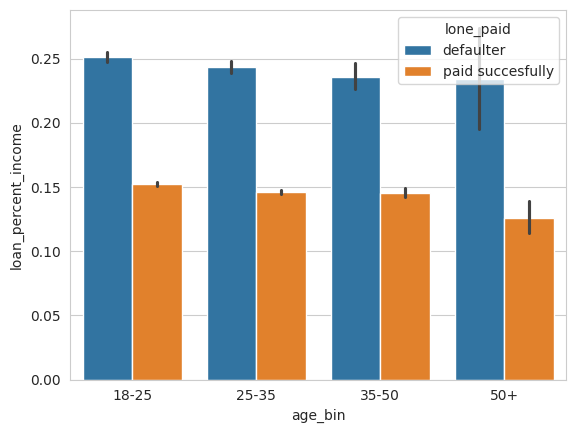

In [188]:
# plt age vs lone_income_persentage
sns.barplot(x="age_bin",y="loan_percent_income",hue="lone_paid", data=lone)
plt.show()

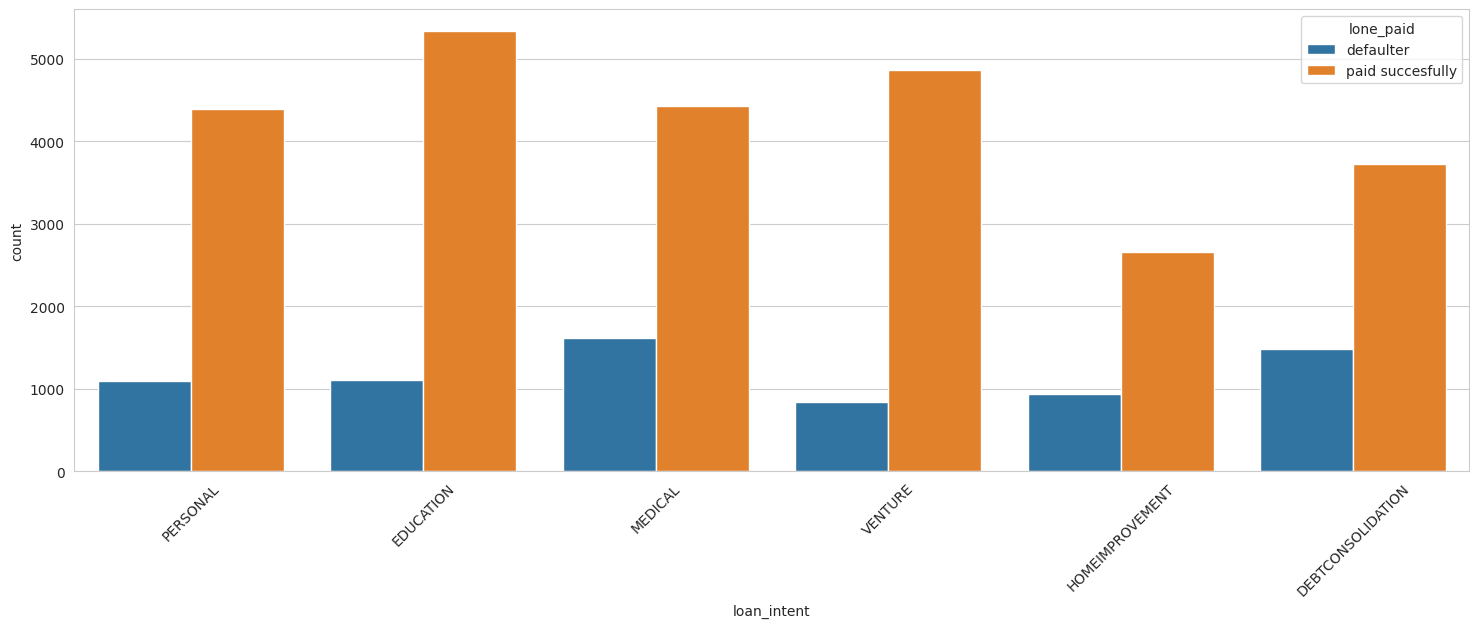

In [189]:
plt.figure(figsize=(18,6))
sns.countplot(data=lone, x="loan_intent", hue="lone_paid")
plt.xticks(rotation=45)
plt.show()


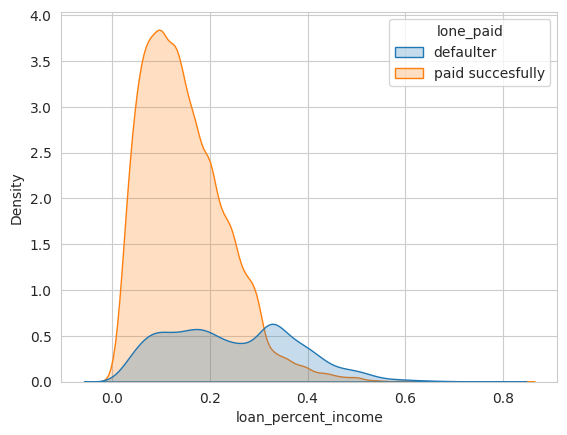

In [190]:
sns.kdeplot(
    data=lone,
    x="loan_percent_income",
    hue="lone_paid",
    fill=True
)
plt.show()


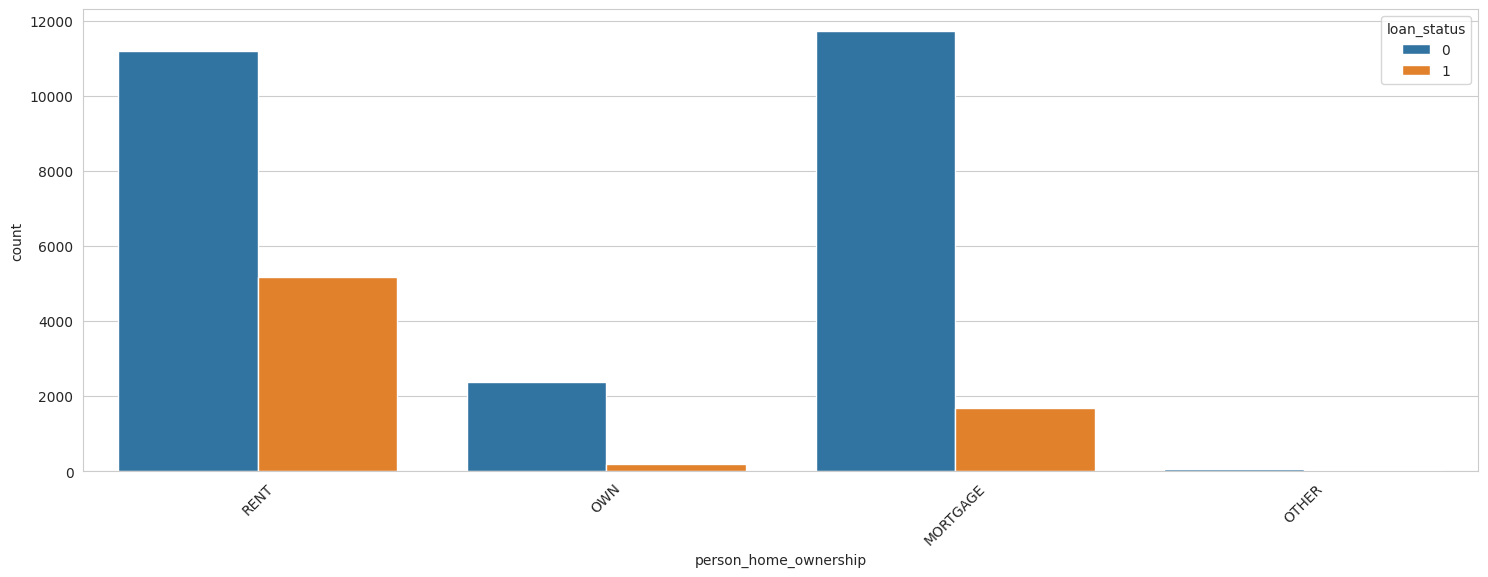

In [191]:
plt.figure(figsize=(18,6))
sns.countplot(data=lone, x="person_home_ownership", hue="loan_status")
plt.xticks(rotation=45)
plt.show()

In [192]:
print(lone.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32496 entries, 0 to 32579
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32496 non-null  int64   
 1   person_income               32496 non-null  int64   
 2   person_home_ownership       32496 non-null  object  
 3   person_emp_length           32496 non-null  float64 
 4   loan_intent                 32496 non-null  object  
 5   loan_grade                  32496 non-null  object  
 6   loan_amnt                   32496 non-null  int64   
 7   loan_int_rate               32496 non-null  float64 
 8   loan_status                 32496 non-null  int64   
 9   loan_percent_income         32496 non-null  float64 
 10  cb_person_default_on_file   32496 non-null  object  
 11  cb_person_cred_hist_length  32496 non-null  int64   
 12  age_bin                     32496 non-null  category
 13  lone_paid            

In [193]:

lone['cred_hist_bin'] = pd.cut(
    lone['cb_person_cred_hist_length'],
    bins=[0, 2, 4, 8, 14, 50],
    labels=['0-2', '3-4', '5-8', '9-14', '15+']
)
print(lone["cred_hist_bin"].value_counts())

cred_hist_bin
3-4     11865
5-8      7541
0-2      5964
9-14     5628
15+      1498
Name: count, dtype: int64


In [194]:
# feature enggniring
lone=pd.get_dummies(lone,columns=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'],drop_first=True)


In [195]:
print(lone.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32496 entries, 0 to 32579
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   person_age                   32496 non-null  int64   
 1   person_income                32496 non-null  int64   
 2   person_emp_length            32496 non-null  float64 
 3   loan_amnt                    32496 non-null  int64   
 4   loan_int_rate                32496 non-null  float64 
 5   loan_status                  32496 non-null  int64   
 6   loan_percent_income          32496 non-null  float64 
 7   cb_person_cred_hist_length   32496 non-null  int64   
 8   age_bin                      32496 non-null  category
 9   lone_paid                    32496 non-null  object  
 10  cred_hist_bin                32496 non-null  category
 11  person_home_ownership_OTHER  32496 non-null  bool    
 12  person_home_ownership_OWN    32496 non-null  bool    
 13  person

In [196]:
# train test spilt
X = lone.drop(columns=['loan_status','age_bin','lone_paid','cred_hist_bin'])
y = lone['loan_status']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [197]:
# model testing
DecisionTreeClassifier(
    max_depth=4,
    class_weight={0:1, 1:2},
    random_state=42
)


DecisionTreeClassifier(class_weight={0: 1, 1: 2}, max_depth=4, random_state=42)

In [198]:
# preadication / output
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [199]:
# accuracy chack
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))





Accuracy: 0.8916923076923077
[[4969  114]
 [ 590  827]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5083
           1       0.88      0.58      0.70      1417

    accuracy                           0.89      6500
   macro avg       0.89      0.78      0.82      6500
weighted avg       0.89      0.89      0.88      6500

ROC AUC Score: 0.8603132253012136
